En esta versión del ejercicio no normalizaremos los datos. Por lo que no obtendremos muy buenos resultados.

In [1]:
import numpy as np
datos = np.load('datasets/pisos_vendidos.npy')
datos

array([[    68,  83420],
       [    87,  98000],
       [    93,  95000],
       [    82,  75000],
       [   103, 118900],
       [   143, 152000],
       [    59,  54000],
       [    50,  45000],
       [    78,  71000],
       [    67,  63000],
       [    92, 120000],
       [    55,  49000],
       [   121, 139000]])

In [2]:
#Vamos a dividir la primera columna (X = metros) de la segunda (y = precios)
X = datos.T[0].reshape(-1, 1)
y = datos.T[1]
print(X)
print(y)

[[ 68]
 [ 87]
 [ 93]
 [ 82]
 [103]
 [143]
 [ 59]
 [ 50]
 [ 78]
 [ 67]
 [ 92]
 [ 55]
 [121]]
[ 83420  98000  95000  75000 118900 152000  54000  45000  71000  63000
 120000  49000 139000]


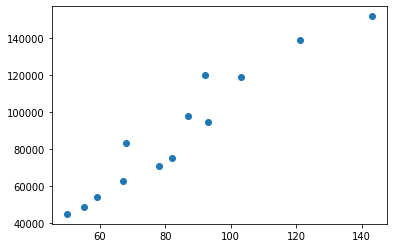

In [3]:
#Dibujamos los datos
import matplotlib.pyplot as plt 
plt.scatter(X, y)
plt.show()

In [4]:
#Contruimos la red, que será muy simple: una única neurona
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, activation=None, input_shape=(1,)))


model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
    )

history = model.fit(
    X, y,
    epochs=200,
    batch_size=2)

2022-04-22 09:57:29.587292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 09:57:29.587310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-22 09:57:31.481392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 09:57:31.481416: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 09:57:31.481435: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2022-04-22 09:57:31.481726: I tensorflow/core/platform/cpu_feature_guard.c

Epoch 1/200
7/7 [==============================] - 0s 744us/step - loss: 9108254720.0000 - mse: 9108254720.0000
Epoch 2/200
7/7 [==============================] - 0s 601us/step - loss: 9108151296.0000 - mse: 9108151296.0000
Epoch 3/200
7/7 [==============================] - 0s 924us/step - loss: 9108043776.0000 - mse: 9108043776.0000
Epoch 4/200
7/7 [==============================] - 0s 727us/step - loss: 9107936256.0000 - mse: 9107936256.0000
Epoch 5/200
7/7 [==============================] - 0s 945us/step - loss: 9107836928.0000 - mse: 9107836928.0000
Epoch 6/200
7/7 [==============================] - 0s 675us/step - loss: 9107738624.0000 - mse: 9107738624.0000
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 9107629056.0000 - mse: 9107629056.0000
Epoch 8/200
7/7 [==============================] - 0s 713us/step - loss: 9107519488.0000 - mse: 9107519488.0000
Epoch 9/200
7/7 [==============================] - 0s 555us/step - loss: 9107418112.0000 - mse: 9107418112

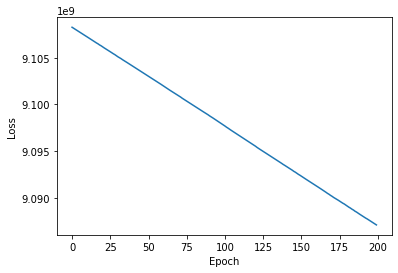

In [5]:
#Vemos el proceso de entrenamiento
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

In [6]:
score, mse = model.evaluate(X, y)
print('Score:', score)
error_al_cuadrado = mse
print('Error:', np.square(error_al_cuadrado), 'euros')

1/1 [==============================] - 0s 86ms/step - loss: 9087066112.0000 - mse: 9087066112.0000
Score: 9087066112.0
Error: 8.25747705238588e+19 euros


In [7]:
#Predecimos cuánto vale un piso de 70 metros cuadrados
X_new = [ [70] ]


y_pred = model.predict(X_new)


print(np.round(y_pred[0][0],2), "euros")


127.46 euros
